In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, learning_rate=0.00001, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.coef = None

    def fit(self, X, y):
        n = len(X)
        m = 0
        b = 0

        for _ in range(self.num_epochs):
            m_gradient = 0
            b_gradient = 0

            for i in range(n):
                x_i = X.iloc[i]
                y_i = y.iloc[i]
                m_gradient += (-2 / n) * x_i * (y_i - (m * x_i + b))
                b_gradient += (-2 / n) * (y_i - (m * x_i + b))

            temp_m = m - m_gradient * self.learning_rate
            temp_b = b - b_gradient * self.learning_rate

            m = temp_m
            b = temp_b

        self.coef = (m, b)

    def predict(self, X):
        if self.coef is None:
            raise ValueError("Model has not been trained yet. Please call fit() first.")
        
        m, b = self.coef
        return X * m + b




In [91]:
data = pd.read_csv("/Users/rujutajoshi/Downloads/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [350]:
data.shape

(200, 4)

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [383]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [384]:
data.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [386]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

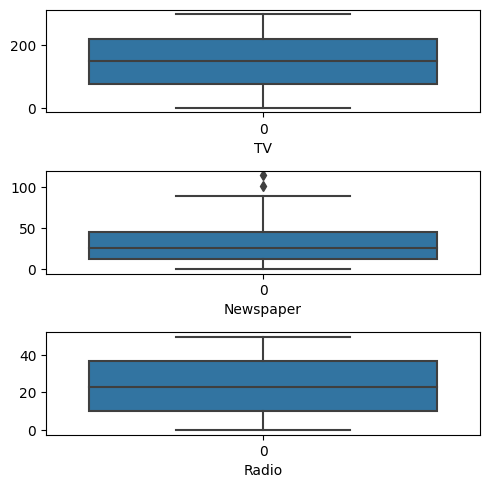

In [398]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt1.set_xlabel('TV')
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt2.set_xlabel('Newspaper')
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt3.set_xlabel('Radio')
plt.tight_layout()



/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

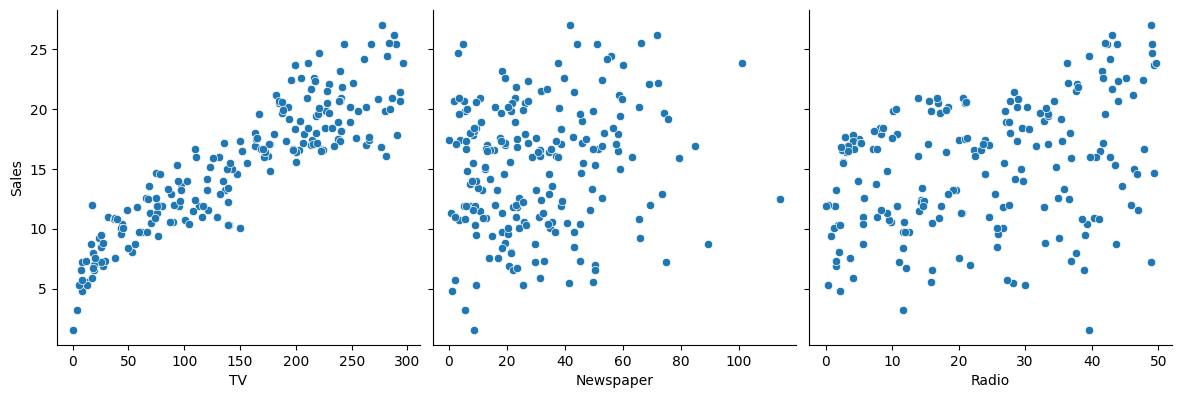

In [224]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

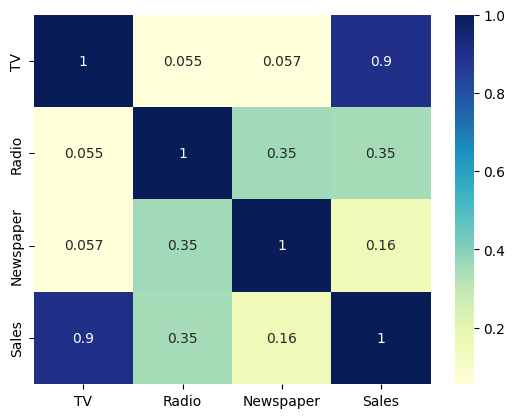

In [226]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

In [92]:
data.drop(["Radio","Newspaper"],axis=1,inplace=True)

In [93]:
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [308]:
data.isnull().sum()


TV       0
Sales    0
dtype: int64

In [94]:
x = data.drop(["Sales"],axis=1)
y = data["Sales"]

In [95]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.80,random_state = 42)

In [96]:
standardscaler = StandardScaler()
x_train = standardscaler.fit(X_train)
x_test = standardscaler.fit_transform(X_test)

In [356]:
X_train.head()
type(X_train)

pandas.core.frame.DataFrame

In [296]:
y_train.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [297]:
X_test.head()

,TV
100,222.4
101,296.4
102,280.2
103,187.9
104,238.2


In [81]:
y_test.shape

(40,)

In [84]:
linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

In [85]:
predictions = linearregression.predict(X_test)

In [86]:
predictions

,TV
95,14.868003
15,17.783949
30,26.640794
158,1.096744
128,20.045851
115,6.855964
69,19.727913
170,4.575894
174,20.236614
45,15.939908


In [329]:

predictions.shape

(40, 1)

Text(0.5, 1.0, 'Linear Regression')

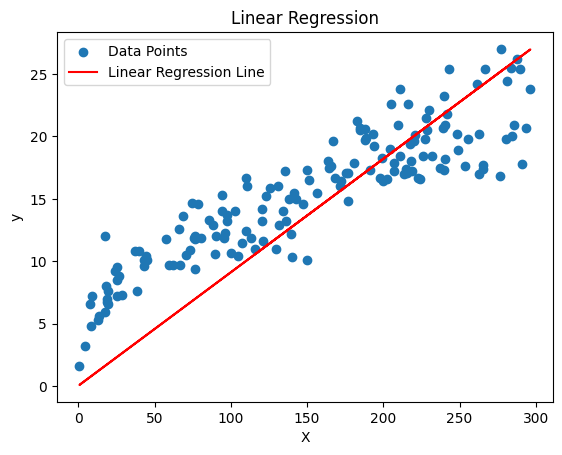

In [36]:

plt.scatter(X_train, y_train, label='Data Points')


# Plot the linear regression line
y_pred_line = linearregressio.predict(X_train)

plt.plot(X_train, y_pred_line, color='red', label='Linear Regression Line')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')






Text(0.5, 1.0, 'Linear Regression')

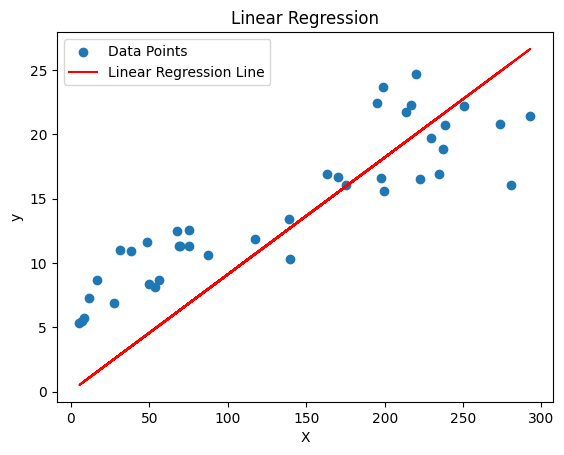

In [37]:

plt.scatter(X_test, y_test, label='Data Points')


# Plot the linear regression line
y_pred_line = linearregressio.predict(X_test)

plt.plot(X_test, y_pred_line, color='red', label='Linear Regression Line')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')






In [188]:
linearregression = LinearRegressions()
m = 0
b = 0
for i in range(1000):
    m, b = linearregression.fit(X_train,y_train,m,b)
    
print(m)
print(b)

TV   NaN
Name: 79, dtype: float64
TV   NaN
Name: 79, dtype: float64


In [317]:
y_predict = linearregressio.predict(X_test)

In [318]:
y_predict

,TV
95,14.868003
15,17.783949
30,26.640794
158,1.096744
128,20.045851
115,6.855964
69,19.727913
170,4.575894
174,20.236614
45,15.939908


In [97]:
y_predict_train = linearregressio.predict(X_train)
y_predict_train = y_predict_train.squeeze()

In [328]:
y_test.shape

(40, 1)

In [100]:

residuals = (y_train - y_predict_train)
residuals

79     0.428703
197   -1.312503
38     6.150898
24     4.006781
122   -3.781957
         ...   
106    4.895092
14     0.425748
92    -0.409668
179    2.523066
102   -5.687134
Length: 160, dtype: float64

In [50]:
residuals_test = (y_test - predictions)
residuals_test

95     2.031997
15     4.616051
30    -5.240794
158    6.203256
128    4.654149
115    5.744036
69     2.572087
170    3.824106
174   -3.736614
45     0.160092
66     8.104636
182    3.560901
165   -4.435771
78     4.775545
186   -2.406024
177    1.205205
56     4.802950
152   -1.383796
82     4.425868
68    -2.699205
124   -1.181574
16     6.307164
148    7.414179
93    -0.625538
65     4.998156
60     3.206168
84     2.271857
67     0.712144
125    2.644879
132    4.903027
9     -2.583642
18     4.979989
55     5.598113
75     7.130891
150   -9.432553
104   -0.971877
135    7.178533
137   -4.096677
164    1.219695
76     4.367993
dtype: float64

/var/folders/sq/fm13glrd2jsbnf0cklwwzv280000gn/T/ipykernel_18775/1224721185.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 15)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

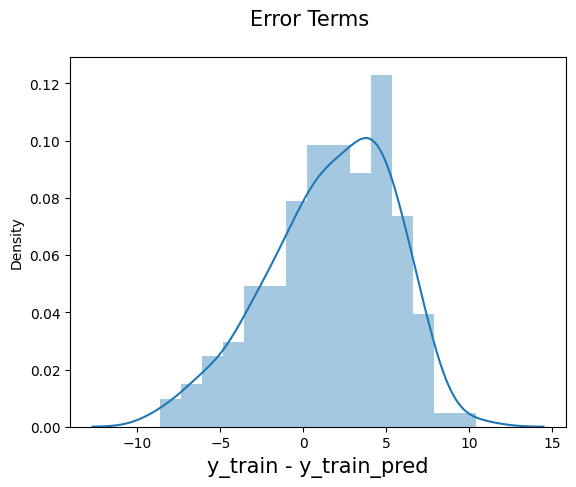

In [43]:
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

/var/folders/sq/fm13glrd2jsbnf0cklwwzv280000gn/T/ipykernel_18775/1828480058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_test, bins = 15)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context(

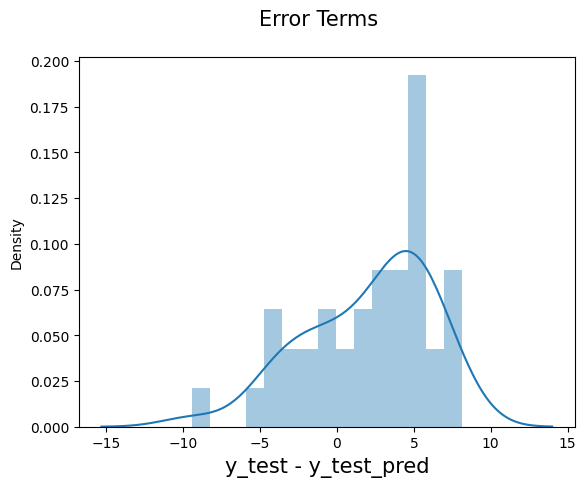

In [87]:
fig = plt.figure()
sns.distplot(residuals_test, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_test - y_test_pred', fontsize = 15)         
plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

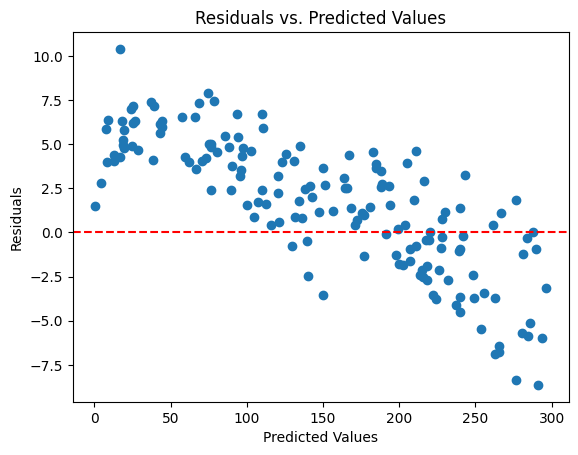

In [102]:
plt.scatter(X_train, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

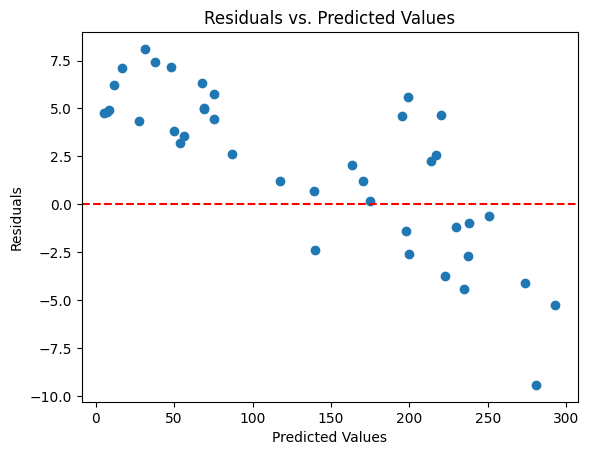

In [103]:

plt.scatter(X_test, residuals_test)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

In [46]:
# Convert predictions DataFrame to a Series
predictions = predictions.squeeze()

In [24]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [25]:
mean_squared_error(y_test, predictions)

20.554411900635337

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, predictions))

4.53369737638446

In [33]:
r_squared = r2_score(y_test, predictions)
r_squared

0.3348323554619306

In [54]:
import statsmodels.api as sm


In [55]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [56]:
lr.params


const    7.007108
TV       0.055483
dtype: float64

In [57]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           1.71e-59
Time:                        00:21:25   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

In [59]:
# Add a constant to get an intercept
X_test_sm = sm.add_constant(X_test)
# Fit the resgression line using 'OLS'
lr_test = sm.OLS(y_test, X_test_sm).fit()

In [60]:
print(lr_test.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           5.30e-15
Time:                        00:23:26   Log-Likelihood:                -92.823
No. Observations:                  40   AIC:                             189.6
Df Residuals:                      38   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8778      0.719      9.566      0.0